<a href="https://colab.research.google.com/github/FatimaMirandap/DataMiningProjects/blob/main/4ESTGUARDPROJECT_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling and evaluation

K-Nearest Neighbors - Precisión del modelo: 1.0
K-Nearest Neighbors - Informe de clasificación:
               precision    recall  f1-score   support

        alta       1.00      1.00      1.00        32
        baja       1.00      1.00      1.00        30

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



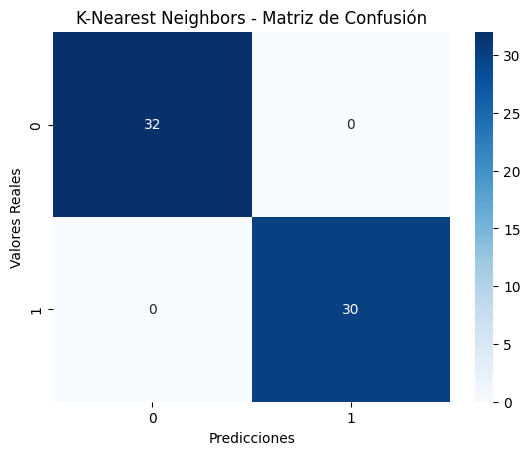

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '/content/drive/MyDrive/conjunto_datos_densidad_vegetacion.csv'
data = pd.read_csv(file_path)


data.dropna(inplace=True)

X = data[['Densidad Vegetacion']]
y = data['Etiqueta']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
# Crear y entrenar el modelo KNN
# El número de vecinos (n_neighbors) es un hiperparámetro que puedes ajustar
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Mostrar resultados
print("K-Nearest Neighbors - Precisión del modelo:", accuracy_knn)
print("K-Nearest Neighbors - Informe de clasificación:\n", report_knn)

# Matriz de confusión
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues')
plt.title('K-Nearest Neighbors - Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


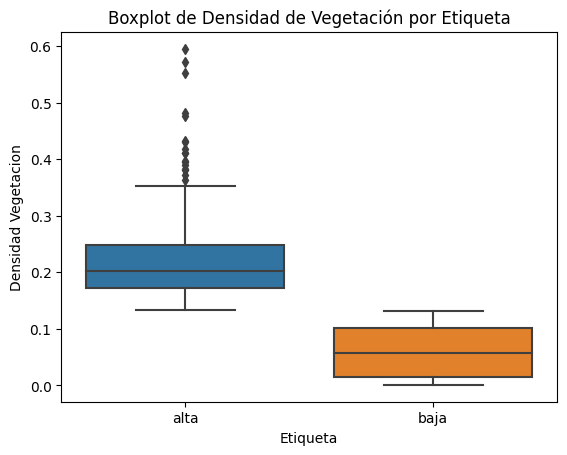

In [ ]:
import seaborn as sns

# Gráfico de caja para cada clase
sns.boxplot(x='Etiqueta', y='Densidad Vegetacion', data=data)
plt.title('Boxplot de Densidad de Vegetación por Etiqueta')
plt.show()
